# Data Exploration - Stringency

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import locale
from matplotlib.dates import DateFormatter

## 1. Import data  
I have imported the cleaned stringency data (spanning 01/01/20 – 23/08/20) for the UK combined as well as the individual nations.

In [2]:
string_uk = pd.read_excel('../data/response_indices.xlsx', sheet_name='UK_combined')
string_eng = pd.read_excel('../data/response_indices.xlsx', sheet_name='England')
string_ni = pd.read_excel('../data/response_indices.xlsx', sheet_name='Northern_Ireland')
string_scot = pd.read_excel('../data/response_indices.xlsx', sheet_name='Scotland')
string_wales = pd.read_excel('../data/response_indices.xlsx', sheet_name='Wales')

## 2. Check data  
I first want to check that the data was imported correctly and to have a recap of the structure of the dataframe.

In [3]:
string_uk.head()

,date,c1_school_closing,c2_workplace_closing,c3_cancel_public_events,c4_restrictions_on_gatherings,c5_close_public_transport,c6_stay_at_home_requirements,c7_restrictions_on_internal_movement,c8_international_travel_controls,e1_income_support,...,h3_contact_tracing,h4_emergency_investment_in_healthcare,h5_investment_in_vaccines,confirmed_cases,confirmed_deaths,stringency_index,stringency_legacy_index,government_response_index,containment_health_index,economic_support_index
0,20200101,0,0,0,0,0,0,0,0,0,...,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0
1,20200102,0,0,0,0,0,0,0,0,0,...,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0
2,20200103,0,0,0,0,0,0,0,0,0,...,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0
3,20200104,0,0,0,0,0,0,0,0,0,...,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0
4,20200105,0,0,0,0,0,0,0,0,0,...,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0


In [4]:
string_uk.tail()

,date,c1_school_closing,c2_workplace_closing,c3_cancel_public_events,c4_restrictions_on_gatherings,c5_close_public_transport,c6_stay_at_home_requirements,c7_restrictions_on_internal_movement,c8_international_travel_controls,e1_income_support,...,h3_contact_tracing,h4_emergency_investment_in_healthcare,h5_investment_in_vaccines,confirmed_cases,confirmed_deaths,stringency_index,stringency_legacy_index,government_response_index,containment_health_index,economic_support_index
231,20200819,2,2,2,4,1,0,2,2,2,...,2,0.0,0.0,320286,41381,64.35,72.62,72.76,67.8,100.0
232,20200820,2,2,2,4,1,0,2,2,2,...,2,0.0,0.0,321098,41397,64.35,72.62,72.76,67.8,100.0
233,20200821,2,2,2,4,1,0,2,2,2,...,2,0.0,0.0,322280,41403,64.35,72.62,72.76,67.8,100.0
234,20200822,2,2,2,4,1,0,2,2,2,...,2,0.0,0.0,323313,41405,64.35,72.62,72.76,67.8,100.0
235,20200823,2,2,2,4,1,0,2,2,2,...,2,0.0,0.0,324601,41423,64.35,72.62,72.76,67.8,100.0


The above shows the first and last 5 rows. Everything seems to have worked as expected. The following shows the structure of the dataframe. There appears to be 25 columns (variables) and 236 rows (entries), all of which are either integers or floats.

In [5]:
string_uk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   date                                   236 non-null    int64  
 1   c1_school_closing                      236 non-null    int64  
 2   c2_workplace_closing                   236 non-null    int64  
 3   c3_cancel_public_events                236 non-null    int64  
 4   c4_restrictions_on_gatherings          236 non-null    int64  
 5   c5_close_public_transport              236 non-null    int64  
 6   c6_stay_at_home_requirements           236 non-null    int64  
 7   c7_restrictions_on_internal_movement   236 non-null    int64  
 8   c8_international_travel_controls       236 non-null    int64  
 9   e1_income_support                      236 non-null    int64  
 10  e2_debt/contract_relief                236 non-null    int64  
 11  e3_fis

## 3. Basic descriptive statistics
Some simple inital analyses of the few variables that can be investigated in this way.

### 3.1 Total investment in vaccines

In [6]:
string_uk['h5_investment_in_vaccines'].sum()

338688901.08000004

Let's put that in an easier to read format.

In [7]:
vac_invest_uk = string_uk['h5_investment_in_vaccines'].sum()

locale.setlocale(locale.LC_ALL, 'en_GB') # required or it won't work

# This formats the number so that the decimal places are removed and commas are added to 
# make long numbers easier to read:
formated_amount = locale.format_string('%d',
                                       vac_invest_uk,
                                       grouping = True)

print('Total announced public spending on vaccine development:\n'
      '$ {}.'
      .format(formated_amount))

Total announced public spending on vaccine development:
$ 338,688,901.


I thought it would be interesting to look at a break down of this by UK nation. However, the data are a bit odd – apparently only Wales has spent money on vaccine development. This is probably something that is a combined UK spend anyway but it was worth just playing around with it. I've had a quick look at the data in Excel and it looks like the healthcare investment data might be more promising.

In [8]:
vac_invest_eng = locale.format_string('%d',
                                       string_eng['h5_investment_in_vaccines'].sum(),
                                       grouping = True)

vac_invest_ni = locale.format_string('%d',
                                       string_ni['h5_investment_in_vaccines'].sum(),
                                       grouping = True)

vac_invest_scot = locale.format_string('%d',
                                       string_scot['h5_investment_in_vaccines'].sum(),
                                       grouping = True)

vac_invest_wales = locale.format_string('%d',
                                       string_wales['h5_investment_in_vaccines'].sum(),
                                       grouping = True)

print('Total spend by UK nations on vaccine development\n'
      '––––––––––––––––––––––––––––––––––––––––––––––––\n'
      'England: $ {}\n'
      'Northern Ireland: $ {}\n'
      'Scotland: $ {}\n'
      'Wales: $ {}'
      .format(vac_invest_eng, vac_invest_ni, vac_invest_scot, vac_invest_wales)
     )

Total spend by UK nations on vaccine development
––––––––––––––––––––––––––––––––––––––––––––––––
England: $ 0
Northern Ireland: $ 0
Scotland: $ 0
Wales: $ 257,580,748


### 3.2 Total investment in emergency healthcare

In [9]:
string_uk['h4_emergency_investment_in_healthcare'].sum()

6444663712.99

Again, we can make this easier to read.

In [10]:
health_invest_uk = string_uk['h4_emergency_investment_in_healthcare'].sum()

formated_amount = locale.format_string('%d',
                                       health_invest_uk,
                                       grouping = True)

print('Total announced public spending on emergency healthcare ' 
      '(e.g. hospitals, masks etc.): \n'
      '$ {}'
      .format(formated_amount))

Total announced public spending on emergency healthcare (e.g. hospitals, masks etc.): 
$ 6,444,663,712


And once more we can split it into the different UK nations.

In [11]:
health_invest_eng = locale.format_string('%d',
                                         string_eng['h4_emergency_investment_in_healthcare'].sum(),
                                         grouping = True)

health_invest_ni = locale.format_string('%d',
                                        string_ni['h4_emergency_investment_in_healthcare'].sum(),
                                        grouping = True)

health_invest_scot = locale.format_string('%d',
                                          string_scot['h4_emergency_investment_in_healthcare'].sum(),
                                          grouping = True)

health_invest_wales = locale.format_string('%d',
                                           string_wales['h4_emergency_investment_in_healthcare'].sum(),
                                           grouping = True)

print('Total spend by UK nations on emergency healthcare\n'
      '–––––––––––––––––––––––––––––––––––––––––––––––––\n'
      'England: $ {}\n'
      'Northern Ireland: $ {}\n'
      'Scotland: $ {}\n'
      'Wales: $ {}'
      .format(health_invest_eng, health_invest_ni, health_invest_scot, health_invest_wales)
     )

Total spend by UK nations on emergency healthcare
–––––––––––––––––––––––––––––––––––––––––––––––––
England: $ 4,129,592,822
Northern Ireland: $ 0
Scotland: $ 78,366,682
Wales: $ 4,129,592,822


Looking at these results, I wouldn't trust the split nations data. England and Wales spend appears to be identical so it must acutally be combined. Also the total combined spend on emergency health care was over 6 billion dollars. The total of adding up the 4 billion from England & Wales plus the 78 million from Scotland wouldn't add up to 6 billion so some of the data has gotten lost in the split into nations. **Only the combined UK data is reliable!**

### 3.3 Fiscal measures
I'm not happy with the data split according to UK nation so will only look at the combined data for this section.

In [12]:
fiscal_uk = string_uk['e3_fiscal_measures'].sum()

formated_amount = locale.format_string('%d',
                                       fiscal_uk,
                                       grouping = True)

print('Total economic stimulus spending: $ {}'.format(formated_amount))

Total economic stimulus spending: $ 115,768,968,969


### 3.4 Offers of aid

In [13]:
aid_uk = string_uk['e4_international_support'].sum()

formated_amount = locale.format_string('%d',
                                       aid_uk,
                                       grouping = True)

print('Announced offers of Covid-19 related aid spending to other countries: $ {}'
      .format(formated_amount))

Announced offers of Covid-19 related aid spending to other countries: $ 207,860,000


## 4 Exploratory plots

### 4.1 Number of cases and deaths

Immediately upon creating my first plot in this section I realised that I hadn't converted the dates in the dataframe into proper datetime formats. The plot comes out completely wrong without the dates converted to datetime format:

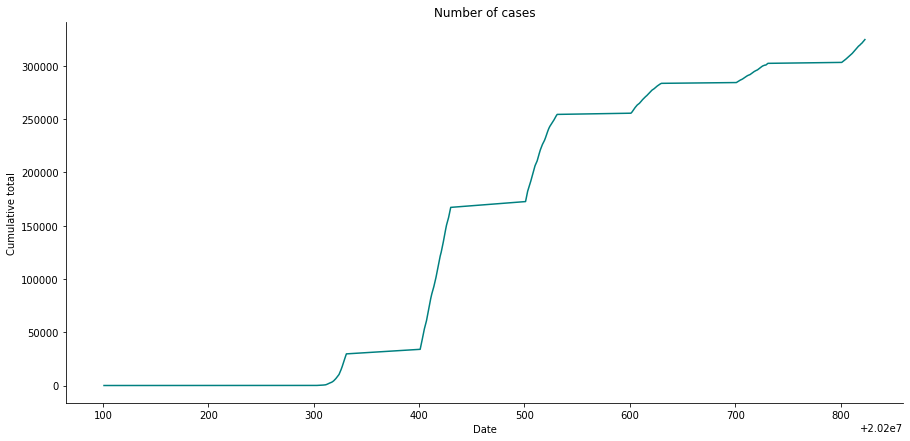

In [14]:
# Plot axes and data.
fig, ax = plt.subplots(figsize=(15, 7))

plt.plot(string_uk['date'], string_uk['confirmed_cases'], color='teal')

# Customise plot.
ax.set_title('Number of cases')
ax.set_xlabel('Date')
ax.set_ylabel('Cumulative total')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# plt.show() - needed in pycharm but not here

I can convert the dates to datetime format using the pandas `to_datetime()` function. This only takes strings as an input but we saw earlier that the date column contains the integer data type. Therefore I use the pandas `.astype()` method to cast the data column data as strings. I then have to specify the format that the date is in. This requires looking at a value in the column and using the correct [codes](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-format-codes).

In [15]:
# convert dates to datetime format
string_uk['date'] = pd.to_datetime(string_uk['date'].astype(str), 
                                   format ='%Y%m%d')

In [16]:
string_uk.head()

,date,c1_school_closing,c2_workplace_closing,c3_cancel_public_events,c4_restrictions_on_gatherings,c5_close_public_transport,c6_stay_at_home_requirements,c7_restrictions_on_internal_movement,c8_international_travel_controls,e1_income_support,...,h3_contact_tracing,h4_emergency_investment_in_healthcare,h5_investment_in_vaccines,confirmed_cases,confirmed_deaths,stringency_index,stringency_legacy_index,government_response_index,containment_health_index,economic_support_index
0,2020-01-01,0,0,0,0,0,0,0,0,0,...,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0
1,2020-01-02,0,0,0,0,0,0,0,0,0,...,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0
2,2020-01-03,0,0,0,0,0,0,0,0,0,...,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0
3,2020-01-04,0,0,0,0,0,0,0,0,0,...,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0
4,2020-01-05,0,0,0,0,0,0,0,0,0,...,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0


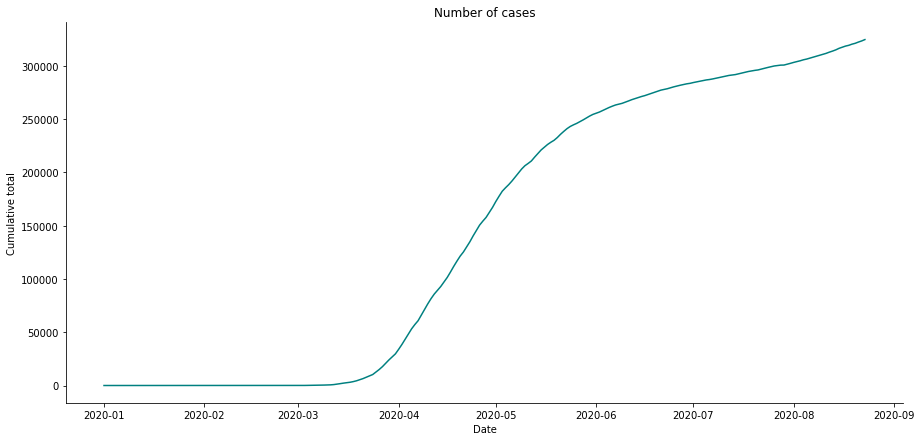

In [17]:
# Plot axes and data.
fig, ax = plt.subplots(figsize=(15, 7))
plt.plot(string_uk['date'], 
         string_uk['confirmed_cases'], 
         color='teal')

# Customise plot.
ax.set_title('Number of cases')
ax.set_xlabel('Date')
ax.set_ylabel('Cumulative total')
ax.spines['top'].set_visible(False) # remove top line of box
ax.spines['right'].set_visible(False) # remove right line of box

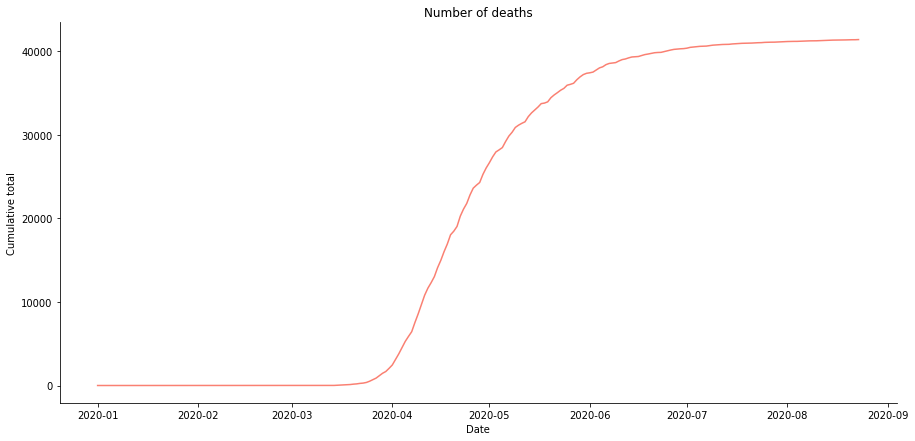

In [18]:
# Plot axes and data.
fig, ax = plt.subplots(figsize=(15, 7))
plt.plot(string_uk['date'], 
         string_uk['confirmed_deaths'], 
         color='salmon')

# Customise plot.
ax.set_title('Number of deaths')
ax.set_xlabel('Date')
ax.set_ylabel('Cumulative total')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

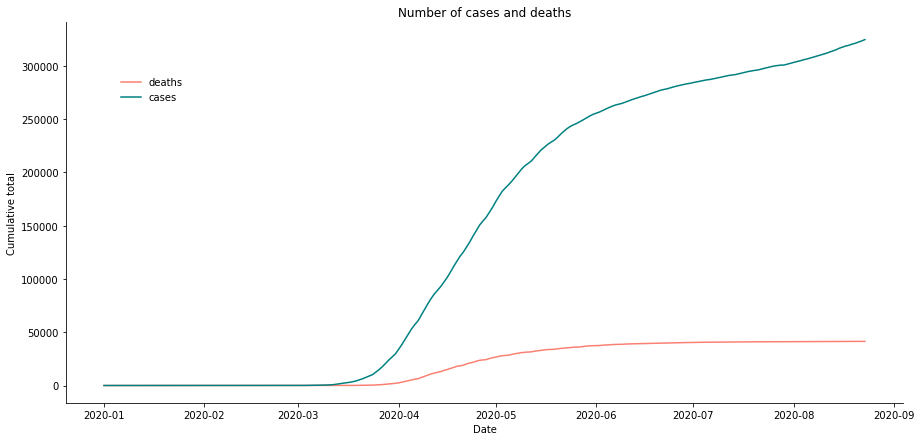

In [19]:
# Plot axes and data.
fig, ax = plt.subplots(figsize=(15, 7))
plt.plot(string_uk['date'], 
         string_uk['confirmed_deaths'], 
         color='salmon', 
         label='deaths')
plt.plot(string_uk['date'], 
         string_uk['confirmed_cases'], 
         color='teal', 
         label='cases')

# Customise plot.
ax.set_title('Number of cases and deaths')
ax.set_xlabel('Date')
ax.set_ylabel('Cumulative total')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Legend
leg = ax.legend(frameon=False, borderpad=5)

### 4.2 Stringency index

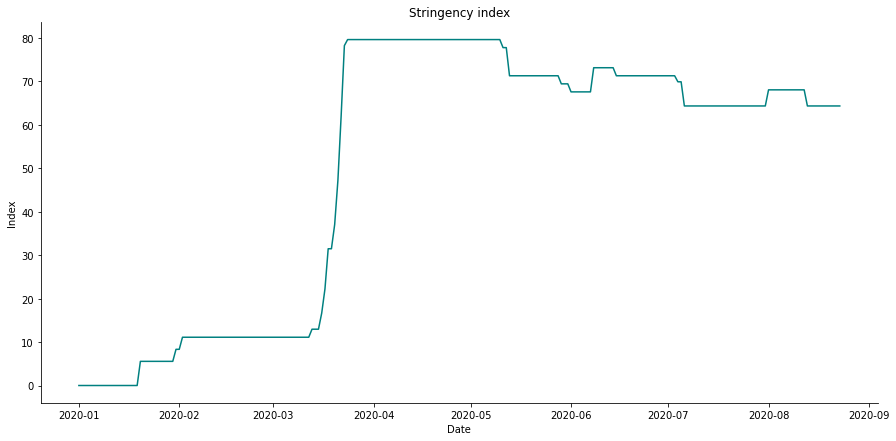

In [20]:
# Plot axes and data.
fig, ax = plt.subplots(figsize=(15, 7))
plt.plot(string_uk['date'], 
         string_uk['stringency_index'], 
         color='teal')

# Customise plot.
ax.set_title('Stringency index')
ax.set_xlabel('Date')
ax.set_ylabel('Index')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

### 4.3 Government response index

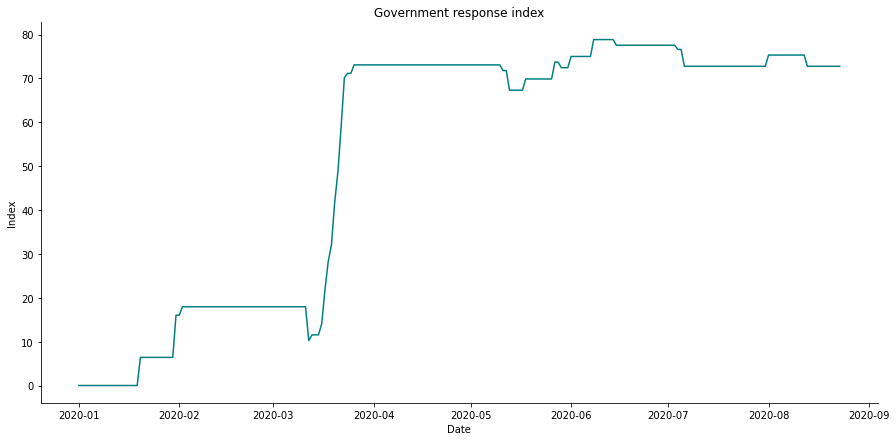

In [21]:
# Plot axes and data.
fig, ax = plt.subplots(figsize=(15, 7))
plt.plot(string_uk['date'], 
         string_uk['government_response_index'], 
         color='teal')

# Customise plot.
ax.set_title('Government response index')
ax.set_xlabel('Date')
ax.set_ylabel('Index')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

### 4.4 Containment health index

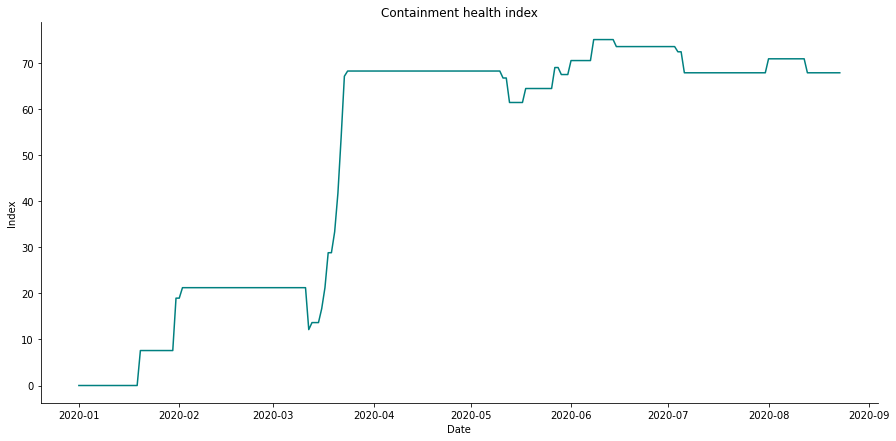

In [22]:
# Plot axes and data.
fig, ax = plt.subplots(figsize=(15, 7))
plt.plot(string_uk['date'], 
         string_uk['containment_health_index'], 
         color='teal')

# Customise plot.
ax.set_title('Containment health index')
ax.set_xlabel('Date')
ax.set_ylabel('Index')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

### 4.5 Economic support index

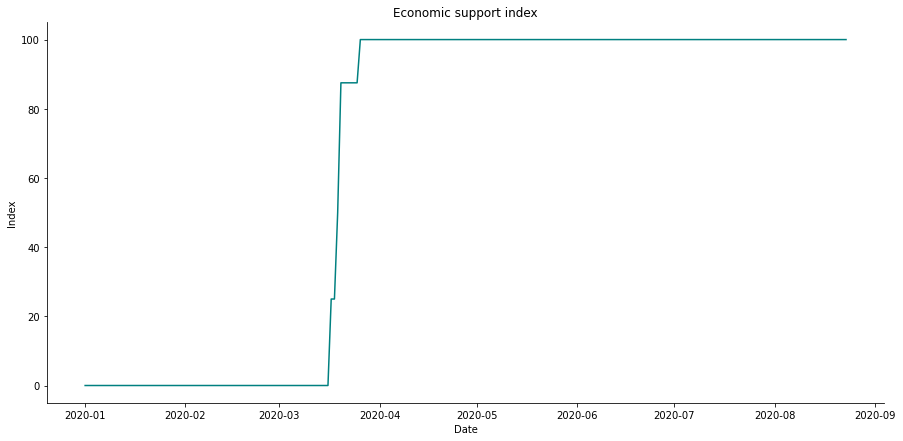

In [23]:
# Plot axes and data.
fig, ax = plt.subplots(figsize=(15, 7))
plt.plot(string_uk['date'], 
         string_uk['economic_support_index'], 
         color='teal')

# Customise plot.
ax.set_title('Economic support index')
ax.set_xlabel('Date')
ax.set_ylabel('Index')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

### 4.6 Indices together

They all look pretty similar, except the economic support index. I've plotted them all together to see just how similar here.

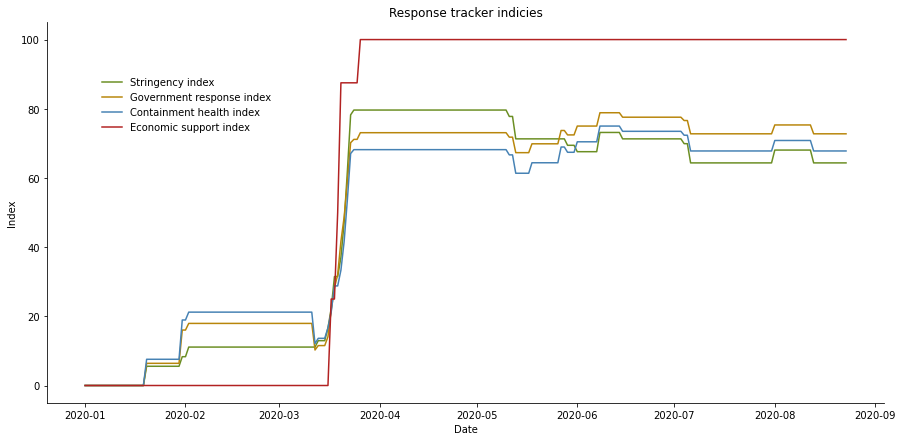

In [24]:
# Plot axes and data.
fig, ax = plt.subplots(figsize=(15, 7))
plt.plot(string_uk['date'], 
         string_uk['stringency_index'], 
         color='olivedrab', 
         label='Stringency index')
plt.plot(string_uk['date'], 
         string_uk['government_response_index'], 
         color='darkgoldenrod', 
         label='Government response index')
plt.plot(string_uk['date'], 
         string_uk['containment_health_index'], 
         color='steelblue', 
         label='Containment health index')
plt.plot(string_uk['date'], 
         string_uk['economic_support_index'], 
         color='firebrick', 
         label='Economic support index')

# Customise plot.
ax.set_title('Response tracker indicies')
ax.set_xlabel('Date')
ax.set_ylabel('Index')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Legend
leg = ax.legend(frameon=False, borderpad=5)

A lot happens in March. It is worth zooming in to this section perhaps.

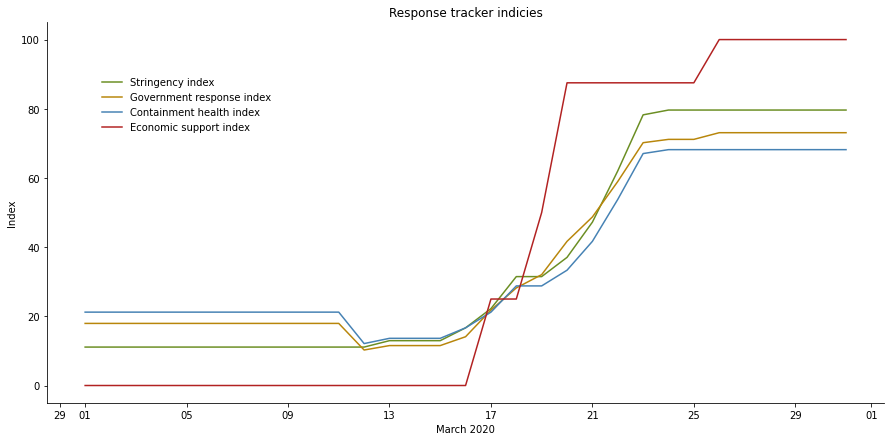

In [25]:
# Choose start and end dates for plot.
start_date = '2020-03-01'
end_date = '2020-03-31'

# Get Python to select only the data you have asked for.
plot_data = string_uk.loc[(string_uk['date'] >= start_date) & 
                          (string_uk['date'] <= end_date)]

# Plot axes and data.
fig, ax = plt.subplots(figsize=(15, 7))
plt.plot(plot_data['date'], 
         plot_data['stringency_index'], 
         color='olivedrab', 
         label='Stringency index')
plt.plot(plot_data['date'], 
         plot_data['government_response_index'], 
         color='darkgoldenrod', 
         label='Government response index')
plt.plot(plot_data['date'], 
         plot_data['containment_health_index'], 
         color='steelblue', 
         label='Containment health index')
plt.plot(plot_data['date'], 
         plot_data['economic_support_index'], 
         color='firebrick', 
         label='Economic support index')

# Customise plot.
ax.set_title('Response tracker indicies')
ax.set_xlabel('March 2020')
ax.set_ylabel('Index')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add legend.
leg = ax.legend(frameon=False, borderpad=5)

# Define the date format
date_form = DateFormatter("%d")
ax.xaxis.set_major_formatter(date_form)

It's probably time that I look into the different indicies and see which one is most useful and what they all mean. I have found out from [here](https://github.com/OxCGRT/covid-policy-tracker/blob/master/documentation/index_methodology.md) that each index just takes into account the different indicators in the dataframe (e.g. the economic support index goes off only E1 and E2). We probably have no need for the legacy stringency index. As the question we have been tasked with asked what happens when the government did something, the government response index might be the most appropriate. If we want to see what happens when lockdown restrictions come in, the stringency index would be best. It might be worth plotting up the different components of the stringency index.